Assignment on Multilayer Neural Network Model
Download the dataset of National Institute of Diabetes and Digestive and Kidney Diseases from below link :
Data Set: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians- diabetes.data.csv
The dataset has total 9 attributes where the last attribute is “Class attribute” having values 0 and 1. (1=”Positive for Diabetes”, 0=”Negative”)
a. Load the dataset in the program. Define the ANN Model with Keras. Define at least two hidden layers. Specify the ReLU function as activation function for the hidden layer and Sigmoid for the output layer.
b. Compile the model with necessary parameters. Set the number of epochs and batch size and fit the model.
c. Evaluate the performance of the model for different values of epochs and batch sizes.
d. Evaluate model performance using different activation functions Visualize the model using ANN Visualizer.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [8]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [9]:
df=pd.read_csv('diabetes.csv')

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=20)

In [14]:
x_train.shape

(576, 8)

In [15]:
mn=MinMaxScaler()

In [27]:
x_train_scale = mn.fit_transform(x_train)

In [28]:
x_test_scale=mn.transform(x_test)

In [18]:
import tensorflow.keras as tk

In [19]:
model = tk.Sequential()

In [20]:
model.add(tk.layers.Input(shape=(8,)))
model.add(tk.layers.Dense(units=8, activation="relu", kernel_initializer="he_uniform"))
model.add(tk.layers.Dense(units=5, activation="relu", kernel_initializer="he_uniform"))
model.add(tk.layers.Dense(units=1, activation="sigmoid", kernel_initializer="he_uniform"))

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
history=model.fit(x_train_scale,
                  y_train,
                  epochs=50,
                  batch_size=64,
                  validation_data=(x_test_scale, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6389 - loss: 0.5819 - val_accuracy: 0.6771 - val_loss: 0.5860
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6740 - loss: 0.5664 - val_accuracy: 0.6771 - val_loss: 0.5848
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.5842 - val_accuracy: 0.6771 - val_loss: 0.5839
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6399 - loss: 0.5932 - val_accuracy: 0.6771 - val_loss: 0.5830
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6450 - loss: 0.5872 - val_accuracy: 0.6771 - val_loss: 0.5821
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6116 - loss: 0.6060 - val_accuracy: 0.6771 - val_loss: 0.5814
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6497 - loss: 0.5745 - val_accuracy: 0.6771 - val_loss: 0.5801
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6203 - loss: 0.5884 - val_accuracy: 0.6771 - val_loss: 0.5794


In [30]:
y_pred_prob = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [32]:
scores = model.evaluate(x_test_scale, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

compile_metrics: 73.44%


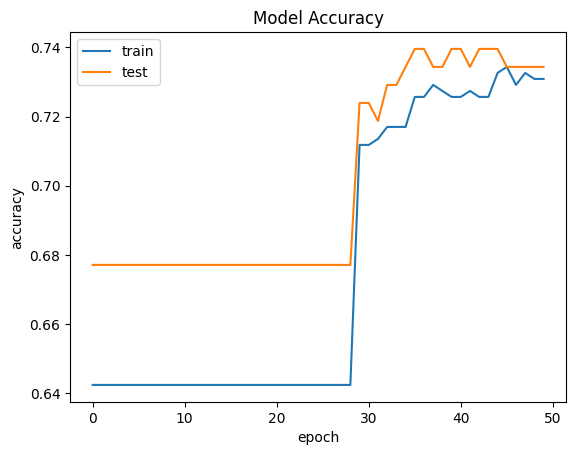

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()